<a href="https://colab.research.google.com/github/lmcanavals/algorithmic_complexity/blob/main/notebooks/bh_clusters_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git

Cloning into 'algorithmic_complexity'...
remote: Enumerating objects: 320, done.
remote: Counting objects: 100% (320/320), done.
remote: Compressing objects: 100% (315/315), done.
remote: Total 320 (delta 188), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (320/320), 294.20 KiB | 3.98 MiB/s, done.
Resolving deltas: 100% (188/188), done.


In [ ]:
from algorithmic_complexity.aclib.ds import DisjointSet
from algorithmic_complexity.aclib.graphstuff import nx2gv
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from heapq import heappush as push, heappop as pop

In [ ]:
def solve(G, k):
  n = G.number_of_nodes()
  ds = DisjointSet(n)

  edges = []
  for u, v in G.edges:
    w = G.edges[u, v]['weight']
    push(edges, (w, u, v))

  while n > k:
    _, u, v = pop(edges)
    if not ds.isSameSet(u, v):
      ds.union(u, v)
      n -= 1

  for u in range(G.number_of_nodes()):
    ds.find(u)

  return ds.s

In [ ]:
%%file 1.in
2 3
3 4
2 6
5 10
6 8
7 9
12 6
12 8
13 7

Overwriting 1.in


In [ ]:
data = np.loadtxt('1.in')
data

array([[ 2.,  3.],
       [ 3.,  4.],
       [ 2.,  6.],
       [ 5., 10.],
       [ 6.,  8.],
       [ 7.,  9.],
       [12.,  6.],
       [12.,  8.],
       [13.,  7.]])

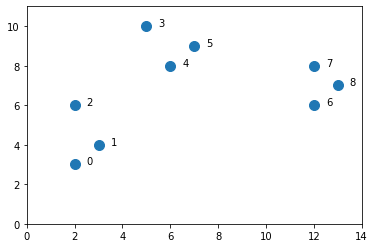

In [ ]:
plt.scatter(data[:, 0], data[:, 1], s=100)
for i, (x, y) in enumerate(data):
  plt.text(x+.5, y, i)
plt.axis([0, 14, 0, 11])
plt.show()

In [ ]:
def dist(u, v):
  x1, y1 = data[u]
  x2, y2 = data[v]
  return math.sqrt((x1-x2)**2 + (y1-y2)**2)

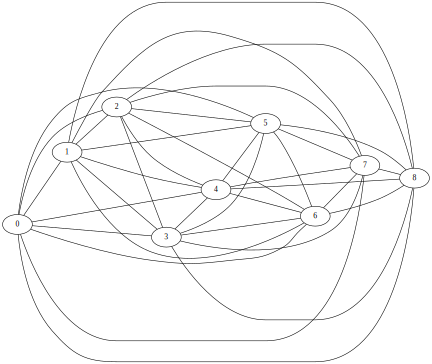

In [ ]:
G = nx.Graph()

for u in range(len(data)):
  G.add_node(u)

for u in range(len(data)):
  for v in range(len(data)):
    if u != v:
      G.add_edge(u, v, weight=dist(u, v))

nx2gv(G)

In [ ]:
res = solve(G, k=3)
res

[1, -3, 1, 5, 5, -3, 8, 8, -3]

In [ ]:
cls = [e if e > 0 else i for i, e in enumerate(res)]
cls

[1, 1, 1, 5, 5, 5, 8, 8, 8]

In [ ]:
data2 = np.vstack((data.transpose(), cls)).transpose()
data2

array([[ 2.,  3.,  1.],
       [ 3.,  4.,  1.],
       [ 2.,  6.,  1.],
       [ 5., 10.,  5.],
       [ 6.,  8.,  5.],
       [ 7.,  9.,  5.],
       [12.,  6.,  8.],
       [12.,  8.,  8.],
       [13.,  7.,  8.]])

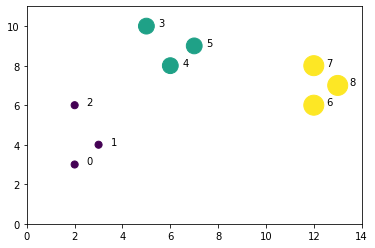

In [ ]:
plt.scatter(data2[:, 0], data2[:, 1], s=data2[:, 2]*50, c=data2[:, 2])
for i, (x, y, _) in enumerate(data2):
  plt.text(x+.5, y, i)
plt.axis([0, 14, 0, 11])
plt.show()